In [2]:
import numpy as np
from sklearn.datasets import fetch_olivetti_faces
import pandas as pd

In [3]:
data=fetch_olivetti_faces()

In [4]:
X=data.data
Y=data.target
Y

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22,
       22, 22, 22, 22, 22

In [5]:
from sklearn.model_selection import train_test_split

x,x_test,y,y_test=train_test_split(X,Y,test_size=0.1,stratify=Y)
x_train,x_cv,y_train,y_cv=train_test_split(x,y,test_size=80,stratify=y)

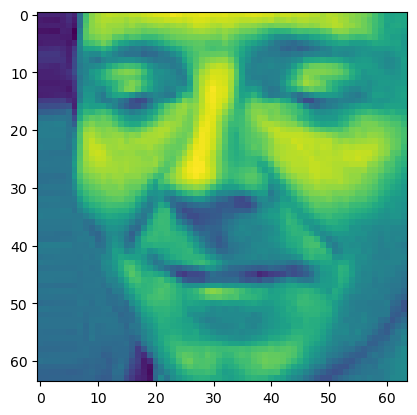

In [6]:
import matplotlib.pyplot as plt
image=x[0].reshape(64,-1)
plt.imshow(image)

In [7]:
len(np.array(np.unique(y_test,return_counts=True)).T)

40

In [8]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
scores=[]
for k in range(100,170,5):
    km=KMeans(n_clusters=k,n_init=10)
    pred=km.fit_predict(x_train)
    scores.append(silhouette_score(x_train,pred))

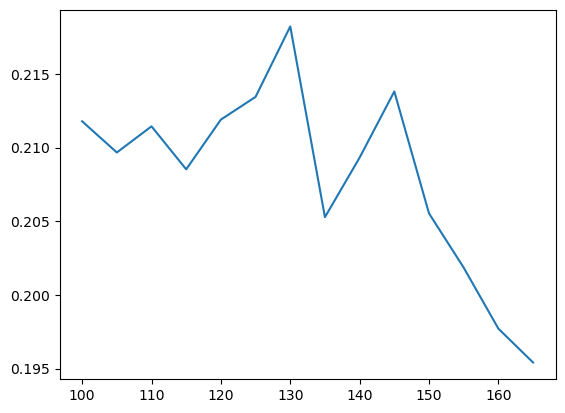

In [9]:
plt.plot(range(100,170,5),scores)

In [10]:
np.array([range(100,170,5),scores])[:,4]

array([120.      ,   0.211905])

In [11]:
km=KMeans(n_clusters=120,n_init=10)
pred=km.fit_predict(x_train)

cluster № 0


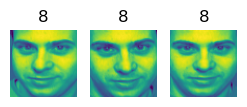

cluster № 1


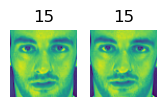

cluster № 2


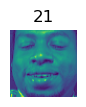

cluster № 3


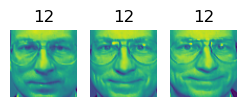

cluster № 4


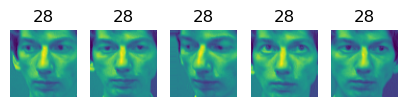

cluster № 5


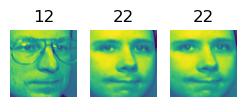

cluster № 6


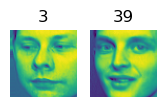

cluster № 7


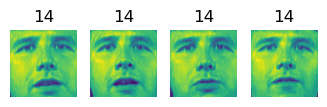

cluster № 8


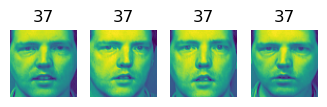

cluster № 9


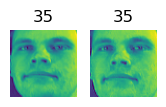

cluster № 10


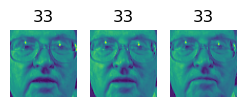

cluster № 11


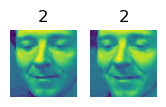

cluster № 12


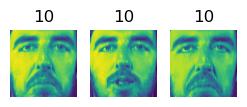

cluster № 13


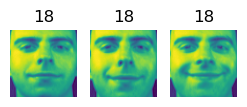

cluster № 14


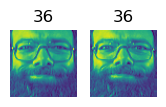

cluster № 15


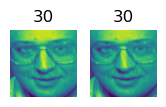

cluster № 16


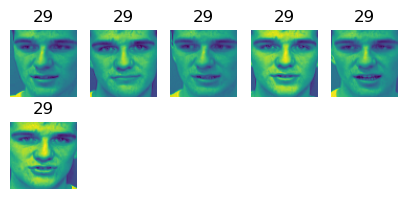

cluster № 17


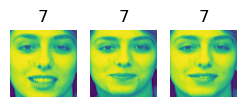

cluster № 18


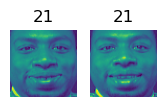

cluster № 19


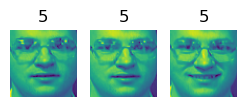

cluster № 20


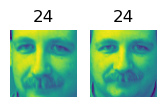

cluster № 21


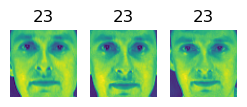

cluster № 22


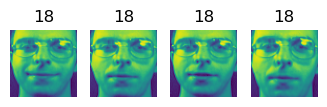

cluster № 23


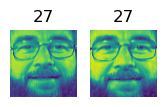

cluster № 24


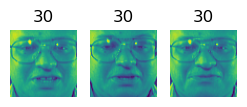

cluster № 25


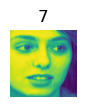

cluster № 26


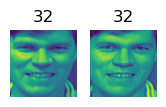

cluster № 27


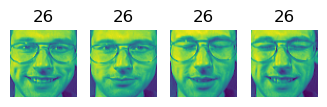

cluster № 28


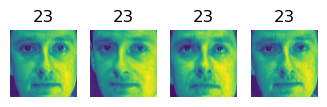

cluster № 29


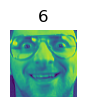

cluster № 30


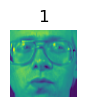

cluster № 31


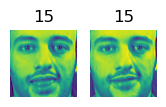

cluster № 32


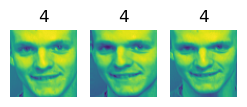

cluster № 33


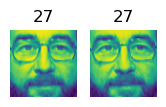

cluster № 34


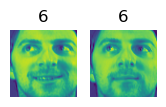

cluster № 35


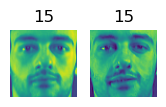

cluster № 36


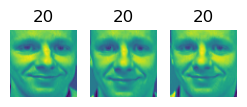

cluster № 37


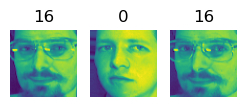

cluster № 38


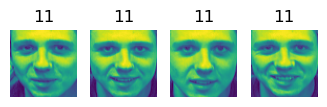

cluster № 39


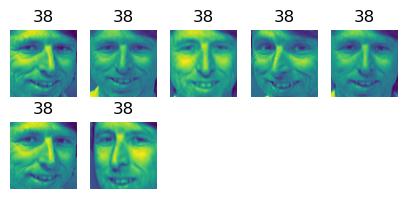

cluster № 40


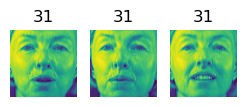

cluster № 41


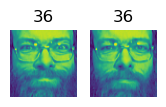

cluster № 42


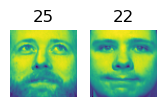

cluster № 43


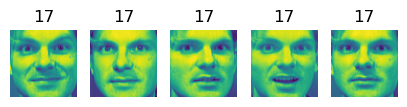

cluster № 44


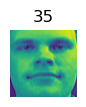

cluster № 45


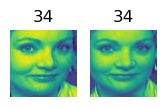

cluster № 46


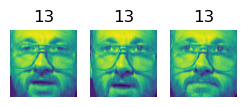

cluster № 47


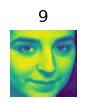

cluster № 48


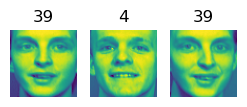

cluster № 49


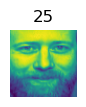

cluster № 50


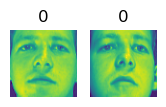

cluster № 51


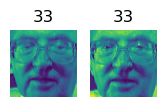

cluster № 52


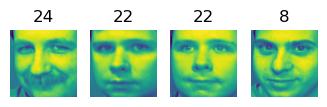

cluster № 53


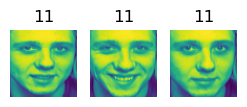

cluster № 54


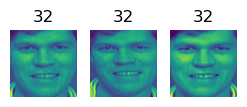

cluster № 55


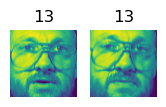

cluster № 56


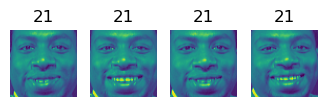

cluster № 57


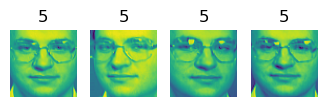

cluster № 58


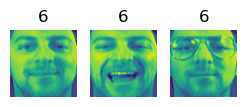

cluster № 59


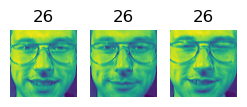

cluster № 60


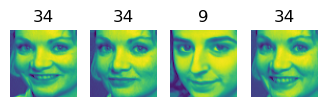

cluster № 61


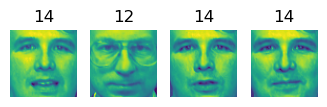

cluster № 62


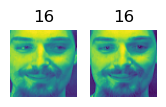

cluster № 63


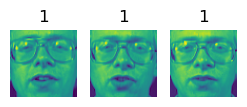

cluster № 64


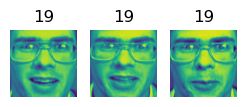

cluster № 65


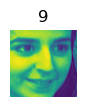

cluster № 66


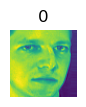

cluster № 67


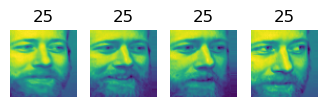

cluster № 68


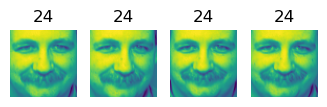

cluster № 69


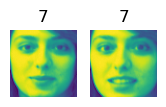

cluster № 70


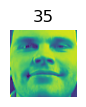

cluster № 71


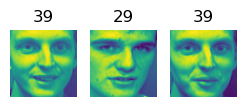

cluster № 72


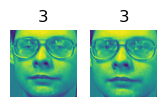

cluster № 73


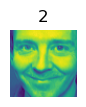

cluster № 74


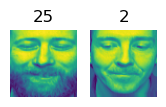

cluster № 75


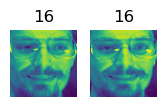

cluster № 76


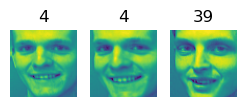

cluster № 77


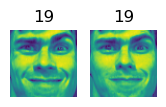

cluster № 78


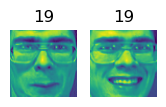

cluster № 79


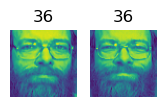

cluster № 80


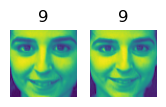

cluster № 81


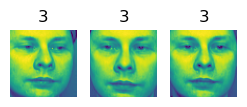

cluster № 82


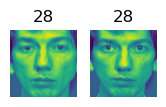

cluster № 83


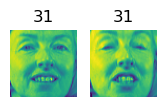

cluster № 84


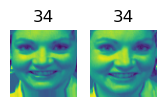

cluster № 85


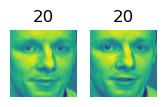

cluster № 86


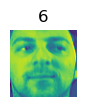

cluster № 87


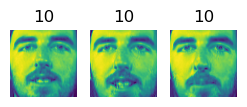

cluster № 88


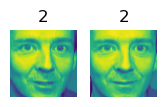

cluster № 89


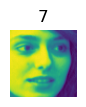

cluster № 90


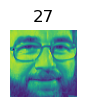

cluster № 91


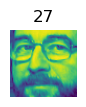

cluster № 92


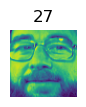

cluster № 93


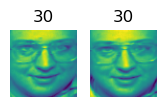

cluster № 94


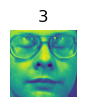

cluster № 95


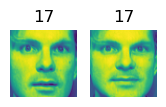

cluster № 96


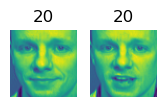

cluster № 97


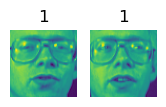

cluster № 98


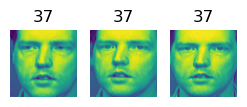

cluster № 99


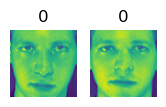

cluster № 100


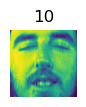

cluster № 101


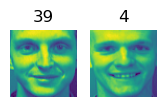

cluster № 102


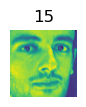

cluster № 103


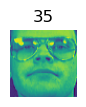

cluster № 104


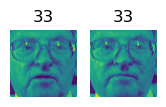

cluster № 105


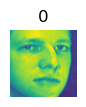

cluster № 106


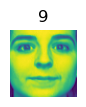

cluster № 107


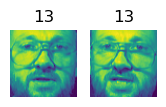

cluster № 108


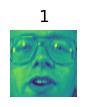

cluster № 109


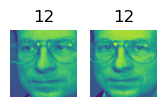

cluster № 110


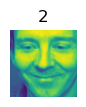

cluster № 111


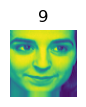

cluster № 112


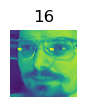

cluster № 113


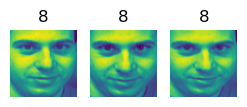

cluster № 114


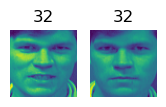

cluster № 115


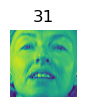

cluster № 116


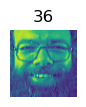

cluster № 117


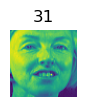

cluster № 118


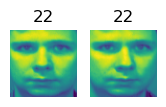

cluster № 119


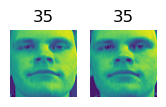

In [12]:
def plot_faces(faces,labels, n_cols=5):
    faces=faces.reshape(-1,64,64)
    rows=(len(faces))//n_cols+1
    plt.figure(figsize=(5,rows*1.1))
    for i,(face,label) in enumerate(zip(faces,labels)):
        plt.subplot(rows,5,i+1)
        plt.axis('off')
        plt.imshow(face)
        plt.title(label)
    plt.show()
        
for x in np.unique(pred):
    ind=(pred==x)
    print('cluster №',x)
    in_cluster = pred==x
    faces = x_train[in_cluster]
    labels = y_train[in_cluster]
    plot_faces(faces, labels)

In [13]:
from sklearn.ensemble import RandomForestClassifier

forest=RandomForestClassifier().fit(x_train,y_train)
forest.score(x_cv,y_cv)


0.9375

In [14]:
km_x_cv=km.transform(x_cv)
km_x_train=km.transform(x_train)
forest.fit(km_x_train,y_train)
forest.score(km_x_cv,y_cv)

0.8625

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

pipe=make_pipeline(KMeans(n_init=5),RandomForestClassifier())
params={'kmeans__n_clusters':range(100,140)}
search=GridSearchCV(pipe,params,cv=3,verbose=1).fit(x_train,y_train)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


In [16]:
best=search.best_estimator_
best.score(x_cv,y_cv)

0.85

In [17]:
addition=best['kmeans'].transform(x_cv)
addition_tr=best['kmeans'].transform(x_train)

x_train_ext=np.c_[addition_tr,x_train]
x_cv_ext=np.c_[addition,x_cv]
forest.fit(x_train_ext,y_train)
forest.score(x_cv_ext,y_cv)

0.9625

In [18]:
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA

pca=PCA(n_components=0.99)
x_train_pca=pca.fit_transform(x_train)
x_cv_pca=pca.transform(x_cv)
x_test_pca=pca.transform(x_test)

In [36]:
gaus=GaussianMixture(n_components=40).fit(x_train_pca)

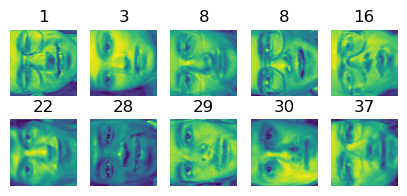

In [229]:
fake,lab_f=gaus.sample(10)
fake_rot=pca.inverse_transform(fake)
fake_rot=np.transpose(fake_rot.reshape(-1,64,64),[0,2,1])
fake_rot=fake_rot.reshape(-1,64*64)
plot_faces(fake_rot,lab_f)

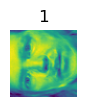

In [157]:
plot_faces(np.transpose(fake_rot.reshape(-1,64,64)).reshape(-1,4096),[1])

In [217]:
x_train
fake_rot.reshape(-1,4096)

array([[0.39436231, 0.37078364, 0.36656637, ..., 0.24865999, 0.25470011,
        0.2356944 ],
       [0.50453109, 0.50742214, 0.50707545, ..., 0.45264419, 0.44686378,
        0.49277724],
       [0.28533151, 0.34542144, 0.36206401, ..., 0.30263605, 0.27941712,
        0.26194755],
       ...,
       [0.25654351, 0.26193889, 0.27966539, ..., 0.50470081, 0.4648033 ,
        0.45364298],
       [0.38206663, 0.37508002, 0.36281842, ..., 0.08104546, 0.09150985,
        0.14623761],
       [0.60695788, 0.57238083, 0.65420715, ..., 0.15280044, 0.12797372,
        0.09927452]])

In [221]:
gaus.score_samples(pca.transform(fake_rot.reshape(-1,4096)))

array([-34756339.33662035, -27669544.12238671, -24778648.77249229,
       -30141012.42694256, -42926245.39059176, -19435078.34470241,
       -44146381.02763497, -30851302.61906433, -38999048.85344765,
       -30665636.72040259])

In [225]:
gaus.score_samples(fake)

array([1045.80281064,  976.25292593, 1027.86827593, 1045.21048584,
        999.00814556, 1032.61872486, 1018.42850143, 1028.71057072,
       1033.2905027 , 1065.88211277])

In [265]:
from sklearn.metrics import mean_squared_error
inv_pca=pca.inverse_transform(x_train_pca)
mse=np.array([])
for i in range(len(x_train)):
    mse=np.append(mse,mean_squared_error(x_train[i],inv_pca[i]))
    

In [275]:
mse.mean()

0.00019213251840223425

In [291]:
fake_rot_pca.shape

(10, 198)

In [295]:
fake_rot_pca=pca.transform(fake_rot)
fake_rot_inv=pca.inverse_transform(fake_rot_pca)
mse=np.array([])
for i in range(len(fake_rot)):
    mse=np.append(mse,mean_squared_error(fake_rot[i],fake_rot_inv[i]))
mse.mean()

0.007474436267250655

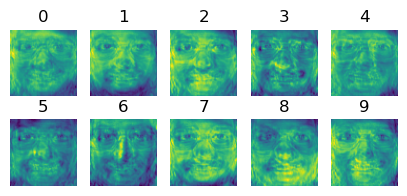

In [299]:
plot_faces(fake_rot_inv,range(len(fake_rot)))